Решается уравнение  
$\frac{\partial{C}}{\partial{t}} + \vec{b}\cdot\nabla C  - \nabla \cdot D \nabla C = 0$,  
$\vec{b} = (1, 0)^T$
\begin{equation}
D = 
\begin{pmatrix}
d_x & 0 \\
0 & d_y
\end{pmatrix}
\end{equation}
Область определения $\widetilde{\Omega} = (0, +\infty) \times (-\infty, +\infty)$, то есть x > 0  
Начальное условие: $C(x, y, 0) = 0$ в $\widetilde{\Omega}$  
Рассмотрив два вида граничных условий  
Первый:  
\begin{equation}
С(0, y, t) =
\begin{cases}
1, |y| < a \\
0, |y| > a
\end{cases}
\end{equation}
a = 10  
Второй:  
\begin{equation}
С(0, y, t) =
\begin{cases}
1, y < 0 \\
0, y > 0
\end{cases}
\end{equation}
$\newline$
Используем метод конечных разностей:  
$\frac{C_{i,j}^{n+1} - C_{i,j}^{n}}{\Delta t} + \frac{C_{i+1,j}^{n} - C_{i-1,j}^{n}}{h} - d_x \cdot \frac{C_{i+1,j}^{n} - 2 \cdot C_{i,j}^{n} + C_{i-1,j}^{n}}{h^2} - d_y\cdot \frac{C_{i,j+1}^{n} - 2\cdot C_{i,j}^{n} + C_{i,j-1}^{n}}{h^2} = 0$  
Используется приближение, ограничивающее область сеткой $[400]\times[400]$ и $[800]\times[800]$, где считаются однородными граничные условия типа Дирихле.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Функции, решающие задачу Дирихле методом конечных разностей

In [15]:
# В начале С = 0
# Nt - номер узла сетки по оси t
# Nx - номер узла сетки по оси x
# Ny - номер узла сетки по оси y
# 0 есть нуль t
# 0 есть нуль x
# Ny // 2 есть нуль y
# Na задает границу а

def start_condition(c, Nx, Ny):
    for i in range(Nx + 1):
        for j in range(Ny + 1):
            c[i][j] = 0
            
def boundary_condition1(c, Ny, Na):
    for j in range(Ny + 1):
        if ((Ny // 2 - Na < j) and (Ny // 2 + Na > j)):
            c[0][j] = 1
        else:
            c[0][j] = 0

def boundary_condition2(c, Ny):
    for j in range(Ny + 1):
        if (j < Ny // 2):
            c[0][j] = 1
        else:
            c[0][j] = 0

def method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D):
    boundary_condition1(cc, Ny, Na)
    for n in range(1, Nt + 1):
        for i in range(1, Nx):
            for j in range(1, Ny):
                cc[i][j] = A * cp[i][j] + B * cp[i + 1][j] + C * cp[i - 1][j] + D * (cp[i][j + 1] + cp[i][j - 1])
        
        for k in range(1, Nx):
            for l in range(1, Ny):
                cp[k][l] = cc[k][l]

# Графики в конечный момент времени для двух разных коэффициентов диффузии

# Коэффициент диффузии dx = ${10}^{-4}$

In [40]:
T = 50
a = 10
dx = 1e-4
dy = 1e-3
x_size = 100
y_size = 100
h = 1
t = 1
Nt = int(T / t)
Nx = int(x_size / h)
Ny = int(y_size / h)
Na = int(2 * a / h)
A = 1 - t * (1 / h + 2 * dx / (h ** 2) + 2 * dy / (h ** 2))
B = dx * t / (h ** 2)
C = dx * t / (h ** 2) + t / h 
D = dy * t / (h ** 2)
cp = np.zeros((Nx + 1, Ny + 1)) # prev time c
cc = np.zeros((Nx + 1, Ny + 1)) # curr time c
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)

Text(0.5, 1.0, 'Численное решение для T = 50, dx = 1e-4')

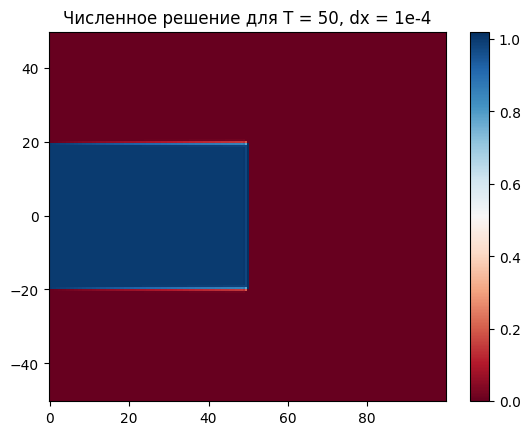

In [21]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        Z[i][j] = cc[i][Ny // 2 - Y.size // 2 + j]
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 50, dx = 1e-4")

Text(0.5, 1.0, 'Численное решение для T = 10, dx = 1e-4')

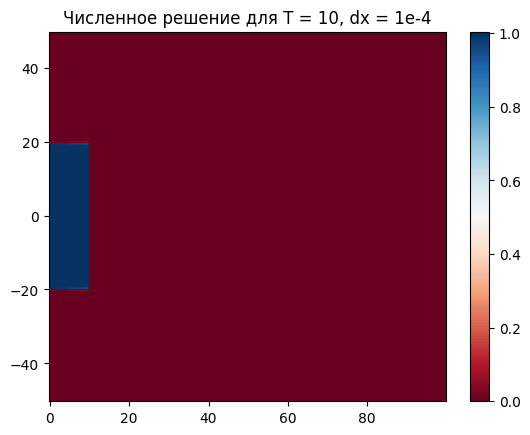

In [30]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
Nt_10 = int(Nt * 10 / T)
method_of_finite_differences(cp, cc, Nt_10, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 10, dx = 1e-4")

Text(0.5, 1.0, 'Численное решение для T = 20, dx = 1e-4')

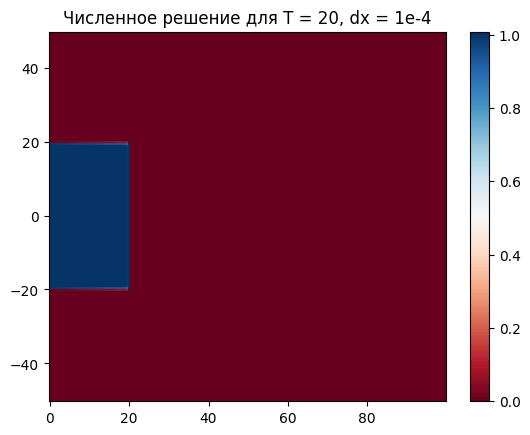

In [33]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
Nt_10 = int(Nt * 20 / T)
method_of_finite_differences(cp, cc, Nt_10, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 20, dx = 1e-4")

Text(0.5, 1.0, 'Численное решение для T = 30, dx = 1e-4')

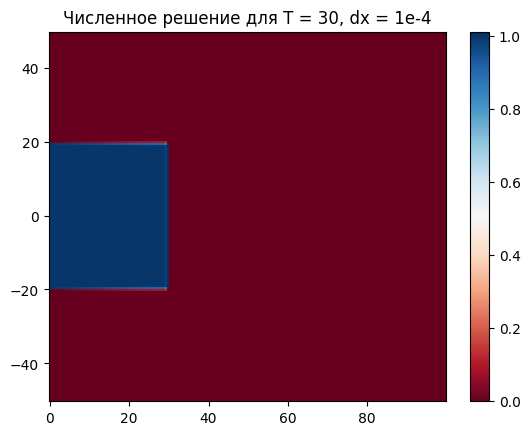

In [35]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
Nt_10 = int(Nt * 30 / T)
method_of_finite_differences(cp, cc, Nt_10, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 30, dx = 1e-4")

Text(0.5, 1.0, 'Численное решение для T = 40, dx = 1e-4')

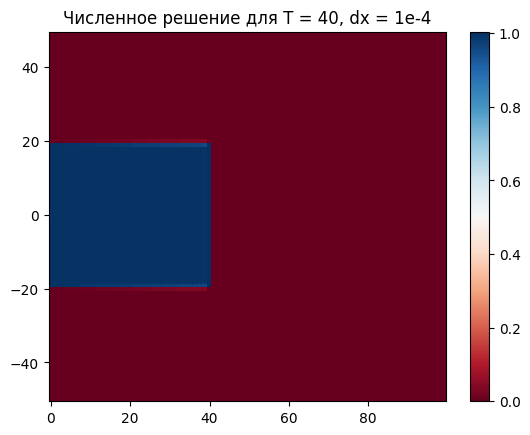

In [41]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
Nt_10 = int(Nt * 40 / T)
method_of_finite_differences(cp, cc, Nt_10, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 40, dx = 1e-4")

# Коэффициент диффузии dx = $1$

In [71]:
T = 50
a = 10
dx = 1
dy = 1e-3
x_size = 100
y_size = 100
h = 1
t = 1 / 8
Nt = int(T / t)
Nx = int(x_size / h)
Ny = int(y_size / h)
Na = int(2 * a / h)
A = 1 - t * (1 / h + 2 * dx / (h ** 2) + 2 * dy / (h ** 2))
B = dx * t / (h ** 2)
C = dx * t / (h ** 2) + t / h 
D = dy * t / (h ** 2)
cp = np.zeros((Nx + 1, Ny + 1)) # prev time c
cc = np.zeros((Nx + 1, Ny + 1)) # curr time c
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)

Text(0.5, 1.0, 'Численное решение для T = 50, dx = 1')

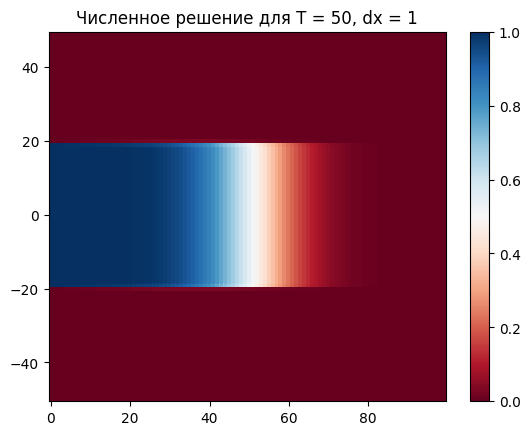

In [72]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        Z[i][j] = cc[i][Ny // 2 - Y.size // 2 + j]
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 50, dx = 1")

Text(0.5, 1.0, 'Численное решение для T = 40, dx = 1')

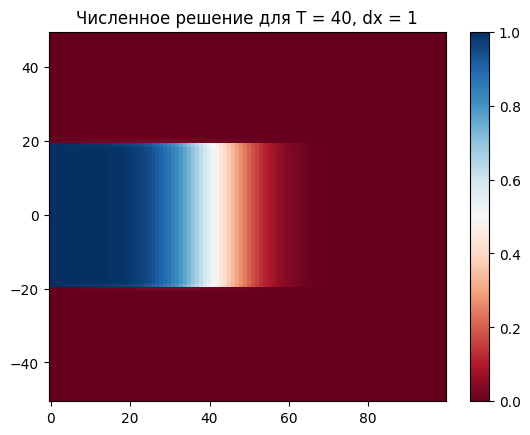

In [73]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
T = 40
Nt = int(T / t)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 40, dx = 1")

Text(0.5, 1.0, 'Численное решение для T = 30, dx = 1')

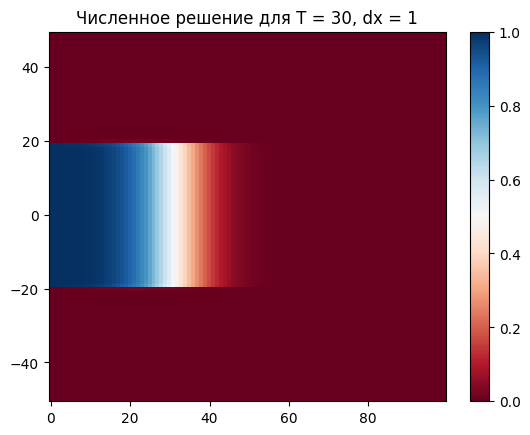

In [74]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
T = 30
Nt = int(T / t)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 30, dx = 1")

Text(0.5, 1.0, 'Численное решение для T = 20, dx = 1')

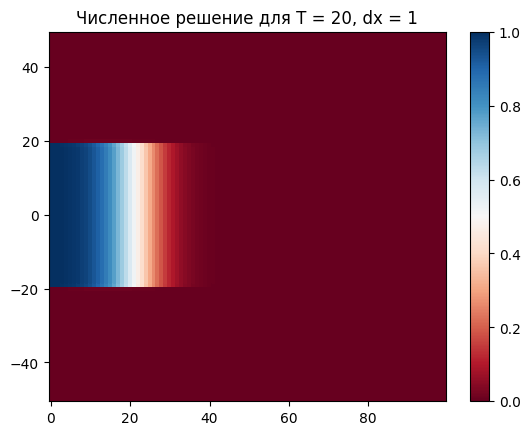

In [75]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
T = 20
Nt = int(T / t)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 20, dx = 1")

Text(0.5, 1.0, 'Численное решение для T = 10, dx = 1')

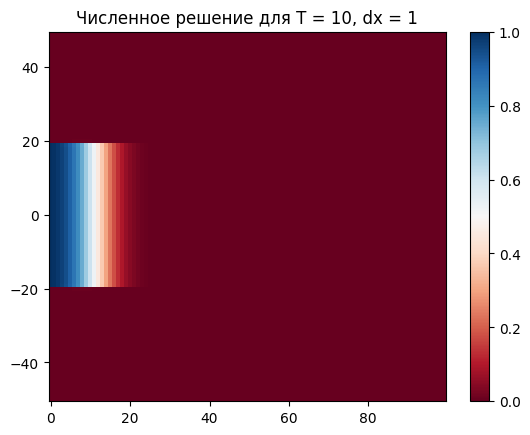

In [76]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
T = 10
Nt = int(T / t)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        Z[i][j] = a
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 10, dx = 1")

# Вид аналитического решения

In [17]:
def f(t, x, y, dx, dy, a):
    return t ** (-1.5) * (math.erf((a + y) / (4 * dy * t) ** (1 / 2)) +
                          math.erf((a - y) / (4 * dy * t) ** (1 / 2))) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)

def integral1(t, x, y, dx, dy, a):
    return t ** (-1.5) * (math.erf((a + y) / (4 * dy * t) ** (1 / 2)) +
                          math.erf((a - y) / (4 * dy * t) ** (1 / 2))) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)

def integral2(t, x, y, dx, dy):
    return t ** (-1.5) * math.erfc(y / (4 * dy * t) ** (1 / 2)) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)


def C(x, dx,integral_val):
    return x / ((16 * math.pi * dx) ** (1 / 2)) * integral_val

# Аналитическое решение для dx = ${10}^{-4}$

Text(0.5, 1.0, 'Аналитическое решение для T = 50, dx = 1e-4')

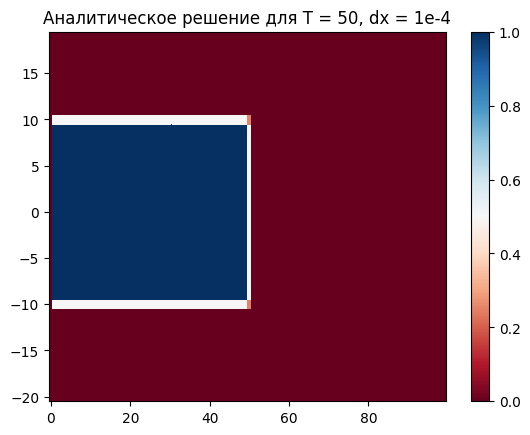

In [43]:
t = 1
h = 1

X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1e-4
dy = 1e-3
a = 10
T = 50

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 50, dx = 1e-4")

Text(0.5, 1.0, 'Аналитическое решение для T = 40, dx = 1e-4')

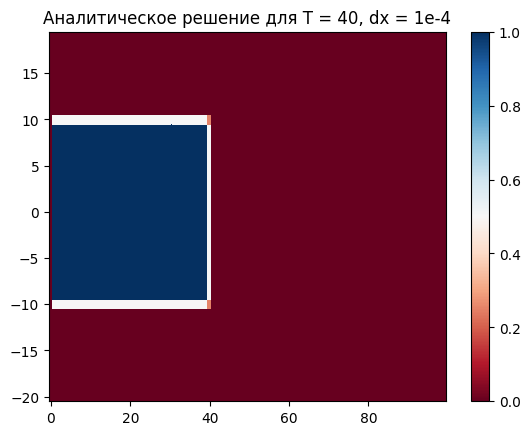

In [46]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))

T = 40
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 40, dx = 1e-4")

Text(0.5, 1.0, 'Аналитическое решение для T = 30, dx = 1e-4')

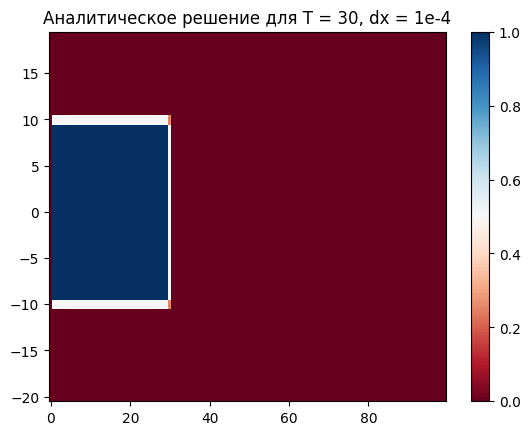

In [48]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))

T = 30
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 30, dx = 1e-4")

Text(0.5, 1.0, 'Аналитическое решение для T = 20, dx = 1e-4')

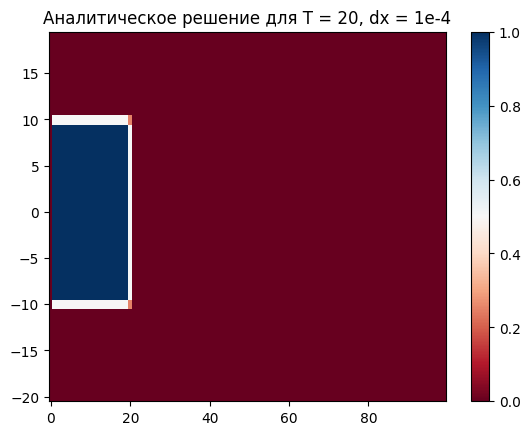

In [50]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))

T = 20
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 20, dx = 1e-4")

Text(0.5, 1.0, 'Аналитическое решение для T = 40, dx = 1e-4')

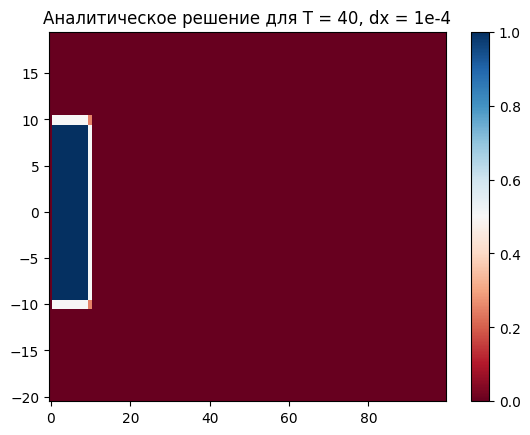

In [51]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))

T = 10
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 10, dx = 1e-4")

# Аналитическое решение для dx = 1

Text(0.5, 1.0, 'Аналитическое решение для T = 50, dx = 1')

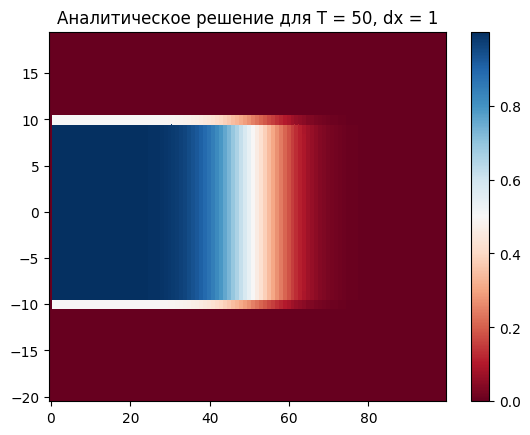

In [61]:
t = 1 / 8
h = 1

X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1
dy = 1e-3
a = 10
T = 50

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 50, dx = 1")

Text(0.5, 1.0, 'Аналитическое решение для T = 40, dx = 1')

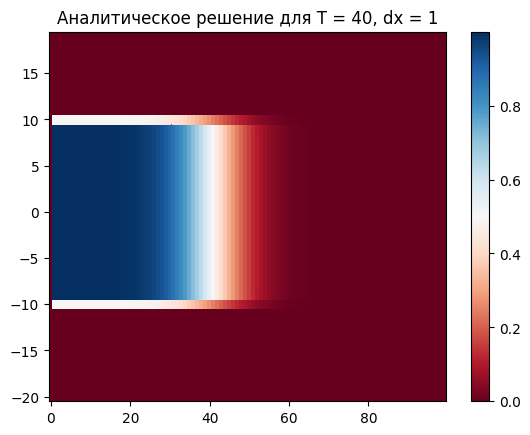

In [62]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1
dy = 1e-3
a = 10
T = 40

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 40, dx = 1")

Text(0.5, 1.0, 'Аналитическое решение для T = 30, dx = 1')

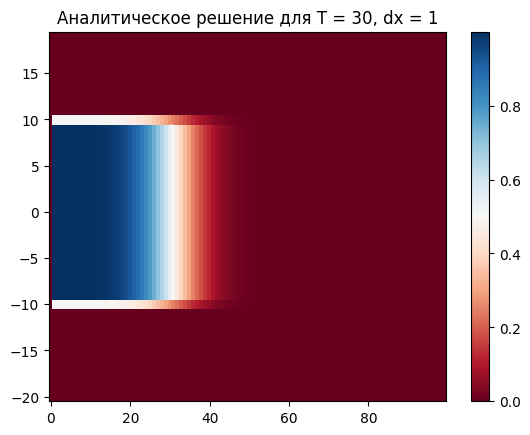

In [63]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1
dy = 1e-3
a = 10
T = 30

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 30, dx = 1")

Text(0.5, 1.0, 'Аналитическое решение для T = 20, dx = 1')

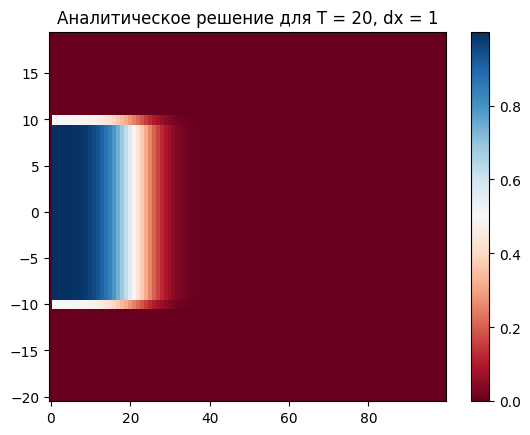

In [64]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1
dy = 1e-3
a = 10
T = 20

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 20, dx = 1")

Text(0.5, 1.0, 'Аналитическое решение для T = 10, dx = 1')

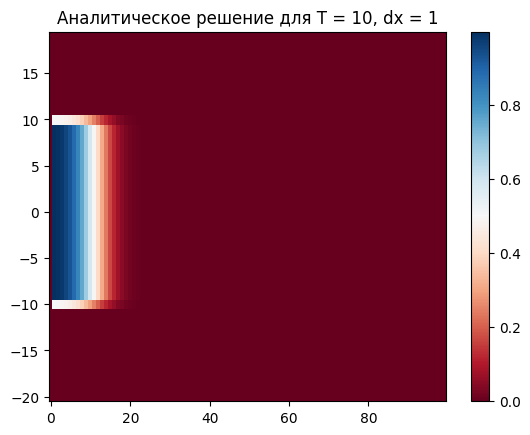

In [65]:
X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
A = np.zeros((X.size, Y.size))
dx = 1
dy = 1e-3
a = 10
T = 10

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)
    
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 10, dx = 1")

# Найдем порядок сходимости

# Определим порядок сходимости в случае dx = ${10}^{-4}$

In [33]:
# Вычисляем численное решение

T = 50
a = 10
dx = 1e-4
dy = 1e-3
x_size = 100
y_size = 100
h = 2
t = 1
Nt = int(T / t)
Nx = int(x_size / h)
Ny = int(y_size / h)
Na = int(2 * a / h)
A = 1 - t * (1 / h + 2 * dx / (h ** 2) + 2 * dy / (h ** 2))
B = dx * t / (h ** 2)
C = dx * t / (h ** 2) + t / h 
D = dy * t / (h ** 2)
cp = np.zeros((Nx + 1, Ny + 1)) # prev time c
cc = np.zeros((Nx + 1, Ny + 1)) # curr time c
start_condition(cp, Nx, Ny)
boundary_condition1(cp, Ny, Na)
method_of_finite_differences(cp, cc, Nt, Nx, Ny, Na, A, B, C, D)

Text(0.5, 1.0, 'Численное решение для T = 50, dx = 1e-4')

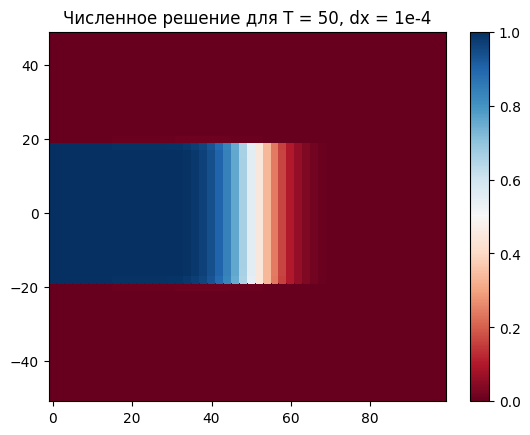

In [34]:
X = np.arange(0, 100, h)
Y = np.arange(-50, 50, h)
Z = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        Z[i][j] = cc[i][Ny // 2 - Y.size // 2 + j]
        
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Численное решение для T = 50, dx = 1e-4")

In [36]:
# Вычисляем аналитическое решение

t = 1
h = 2

def f(t, x, y, dx, dy, a):
    return t ** (-1.5) * (math.erf((a + y) / (4 * dy * t) ** (1 / 2)) +
                          math.erf((a - y) / (4 * dy * t) ** (1 / 2))) *  math.exp(-((x - t) / (4 * dx * t) ** (1 / 2)) ** 2)

def C(x, dx,integral_val):
    return x / ((16 * math.pi * dx) ** (1 / 2)) * integral_val

X = np.arange(0, 100, h)
Y = np.arange(-20, 20, h)
Z = np.zeros((X.size, Y.size))
dx = 1e-4
dy = 1e-3
a = 10
T = 50

n = 1000
nj = np.array([0.0 for i in range(n + 1)]) 
for j in range(1, n + 1):
    nj[j] = math.cos((2 * j - 1) * math.pi / (2 * n))

for i in range(X.size):
    for j in range(Y.size):
        x = i * h
        y = -20 + j * h

        sum = 0
        for k in range(1, n + 1):
            sum += ((1 - nj[k] ** 2) ** (1 / 2)) * f(T * (nj[k] + 1) / 2, x, y, dx, dy, a)
        
        I = math.pi * T / (2 * n) * sum
        Z[i][j] = C(x, dx, I)

Text(0.5, 1.0, 'Аналитическое решение для T = 50, dx = 1e-4')

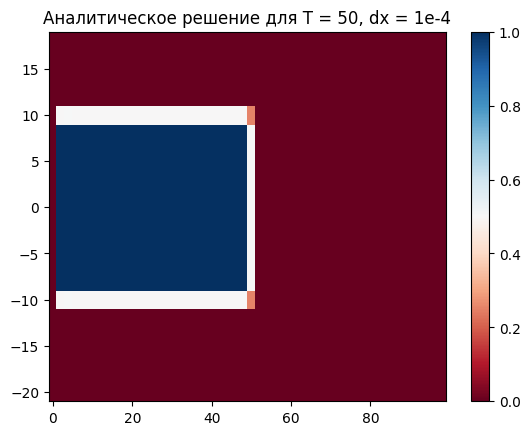

In [37]:
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.title("Аналитическое решение для T = 50, dx = 1e-4")

In [32]:
numeric_solution = np.zeros((X.size, Y.size))
for i in range(X.size):
    for j in range(Y.size):
        a = cc[i][Ny // 2 - Y.size // 2 + j]
        numeric_solution[i][j] = a
print(np.linalg.norm(Z - numeric_solution, 1))

101.00019999999962


|h|$C_h$|
|---|---|
|1|51.06|
|2|26.00|
|4|13|